#HW1 - Data Exploration and Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
!rm *.csv

from google.colab import files
print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

rm: cannot remove '*.csv': No such file or directory
Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [3]:
dataset = pd.read_csv(filename)

In [4]:
dataset.shape

(1250, 25)

#OUR CODE STARTS HERE

In [5]:
from matplotlib import pylab
params = {'xtick.labelsize': 18,
'ytick.labelsize': 18,
'axes.titlesize' : 22,
'axes.labelsize' : 20,
'legend.fontsize': 18,
'legend.title_fontsize': 22,
'figure.titlesize': 24 }
pylab.rcParams.update(params)

In [6]:
# For our use
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             1250 non-null   int64  
 1   age                    1250 non-null   int64  
 2   sex                    1250 non-null   object 
 3   weight                 1250 non-null   float64
 4   blood_type             1250 non-null   object 
 5   current_location       1250 non-null   int64  
 6   num_of_siblings        1250 non-null   int64  
 7   happiness_score        1250 non-null   int64  
 8   household_income       1111 non-null   float64
 9   PCR_02                 1176 non-null   float64
 10  conversations_per_day  1250 non-null   int64  
 11  sugar_levels           1250 non-null   int64  
 12  sport_activity         1250 non-null   int64  
 13  pcr_date               1250 non-null   object 
 14  PCR_01                 1250 non-null   float64
 15  PCR_

In [7]:
# Print the value_counts of the conversations_per_day feature
dataset.conversations_per_day.value_counts()

conversations_per_day
2     220
4     207
3     201
5     153
6     125
1     115
7      77
8      52
10     33
9      23
11     14
12     10
13      7
16      4
14      4
17      3
21      2
Name: count, dtype: int64

In [8]:
# splitting the dataset into train, test
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=103)

In [9]:
# checking for missing (null) values
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1218 to 1097
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             1000 non-null   int64  
 1   age                    1000 non-null   int64  
 2   sex                    1000 non-null   object 
 3   weight                 1000 non-null   float64
 4   blood_type             1000 non-null   object 
 5   current_location       1000 non-null   int64  
 6   num_of_siblings        1000 non-null   int64  
 7   happiness_score        1000 non-null   int64  
 8   household_income       889 non-null    float64
 9   PCR_02                 937 non-null    float64
 10  conversations_per_day  1000 non-null   int64  
 11  sugar_levels           1000 non-null   int64  
 12  sport_activity         1000 non-null   int64  
 13  pcr_date               1000 non-null   object 
 14  PCR_01                 1000 non-null   float64
 15  PCR_03

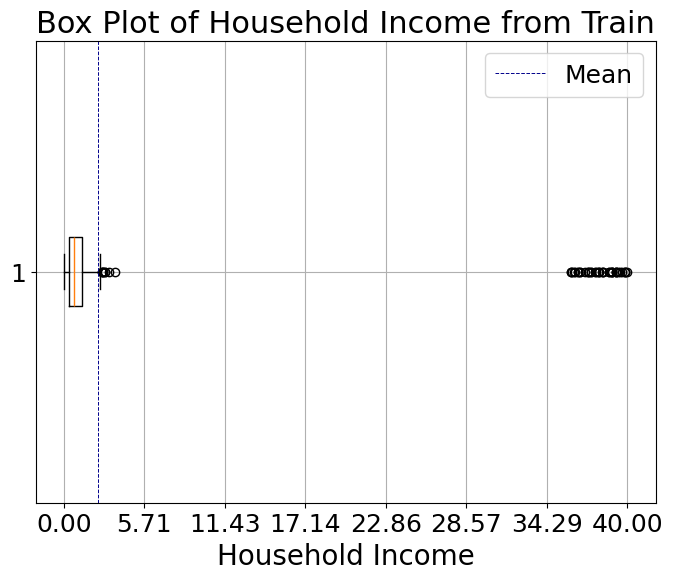

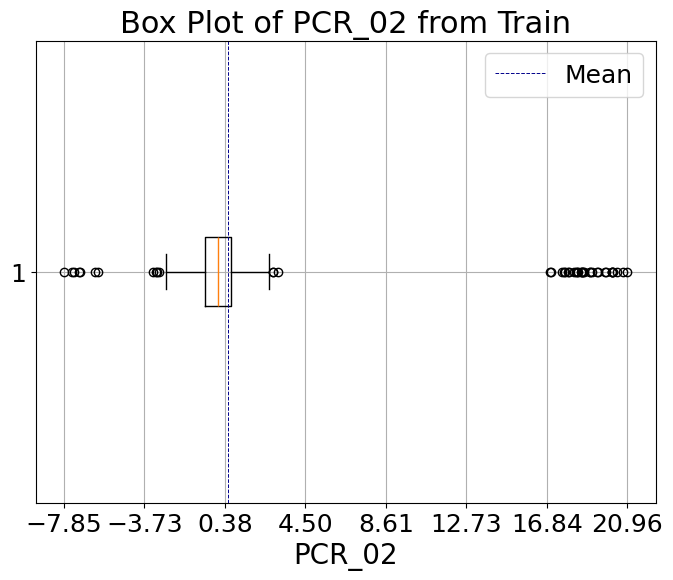

In [10]:
# Plotting box plots to find outliers in our data
def plot_box(series, title, xlabel):
  cleaned_series = series.dropna()
  plt.figure(figsize=(8, 6))
  plt.boxplot(cleaned_series, vert=False)
  plt.xlabel(xlabel)
  plt.title(title)
  min, max = series.min(), series.max()
  plt.xticks(np.linspace(min, max, 8))
  plt.axvline(x=series.mean(), color='darkblue', linestyle='--', label='Mean', linewidth=0.7)
  plt.grid()
  plt.legend()

plot_box(train.household_income, 'Box Plot of Household Income from Train', 'Household Income')
plot_box(train.PCR_02, 'Box Plot of PCR_02 from Train', 'PCR_02')

In [11]:
# calculate the mean and median in "household_income" and "PCR_02"

print(f"The mean in the household_income field is {train.household_income.mean():.3g}.")
print(f"The median in the household_income field is {train.household_income.median():.3g}.")
print(f"The mean in the PCR_02 field is {train.PCR_02.mean():.3g}.")
print(f"The median in the PCR_02 field is {train.PCR_02.median():.3g}.")


The mean in the household_income field is 2.45.
The median in the household_income field is 0.7.
The mean in the PCR_02 field is 0.557.
The median in the PCR_02 field is 0.035.


In [12]:
#  fill the missing values in both training and test sets

train_household_income_median = train.household_income.median()
train_PCR_02_median = train.PCR_02.median()
train = train.fillna(value={"household_income": train_household_income_median, "PCR_02": train_PCR_02_median})
test = test.fillna(value={"household_income": train_household_income_median, "PCR_02": train_PCR_02_median})

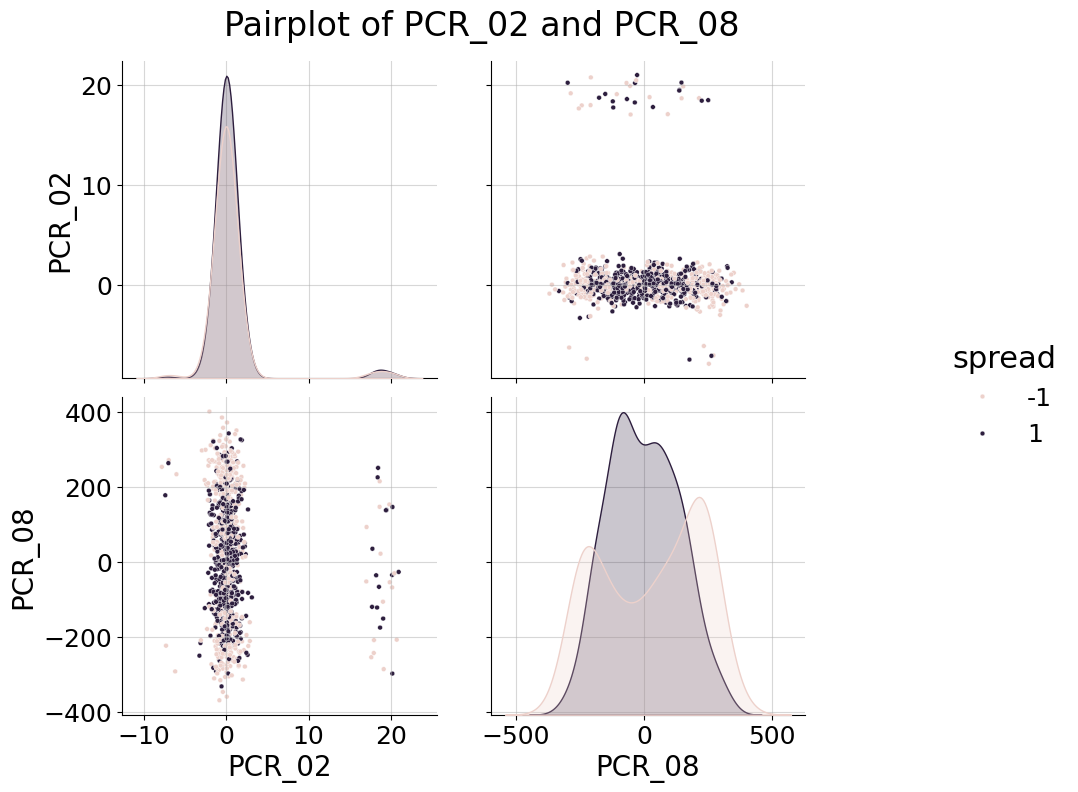

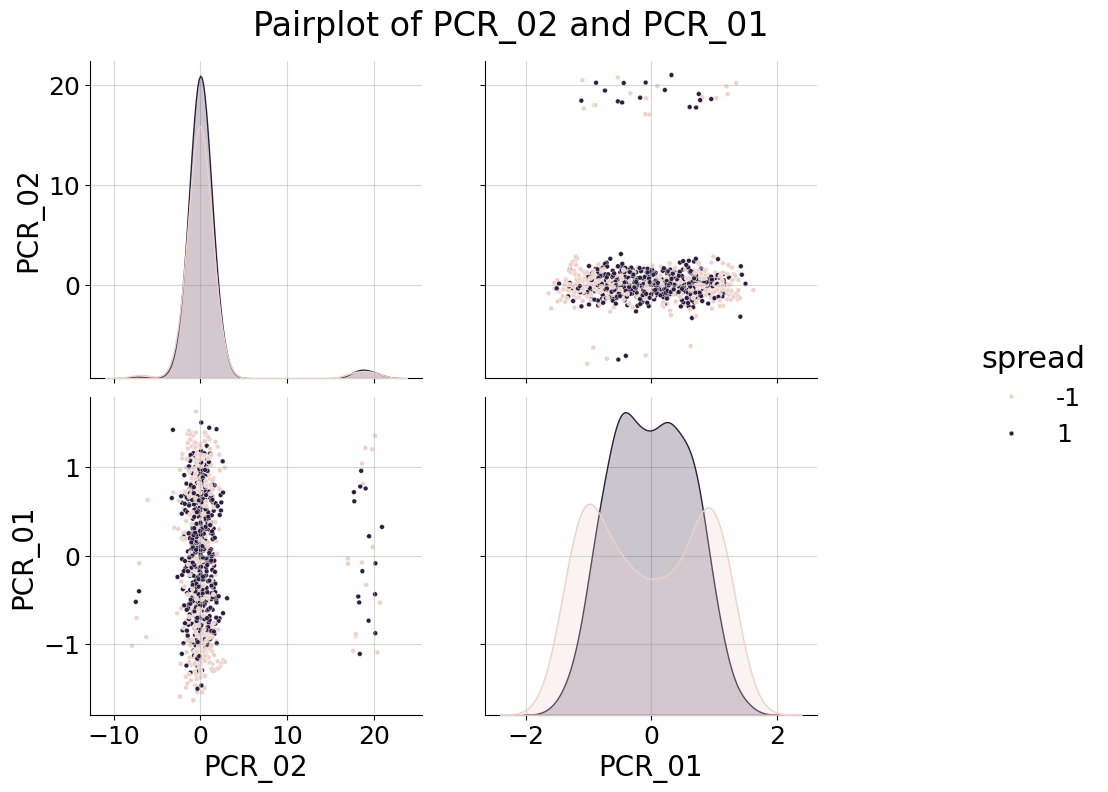

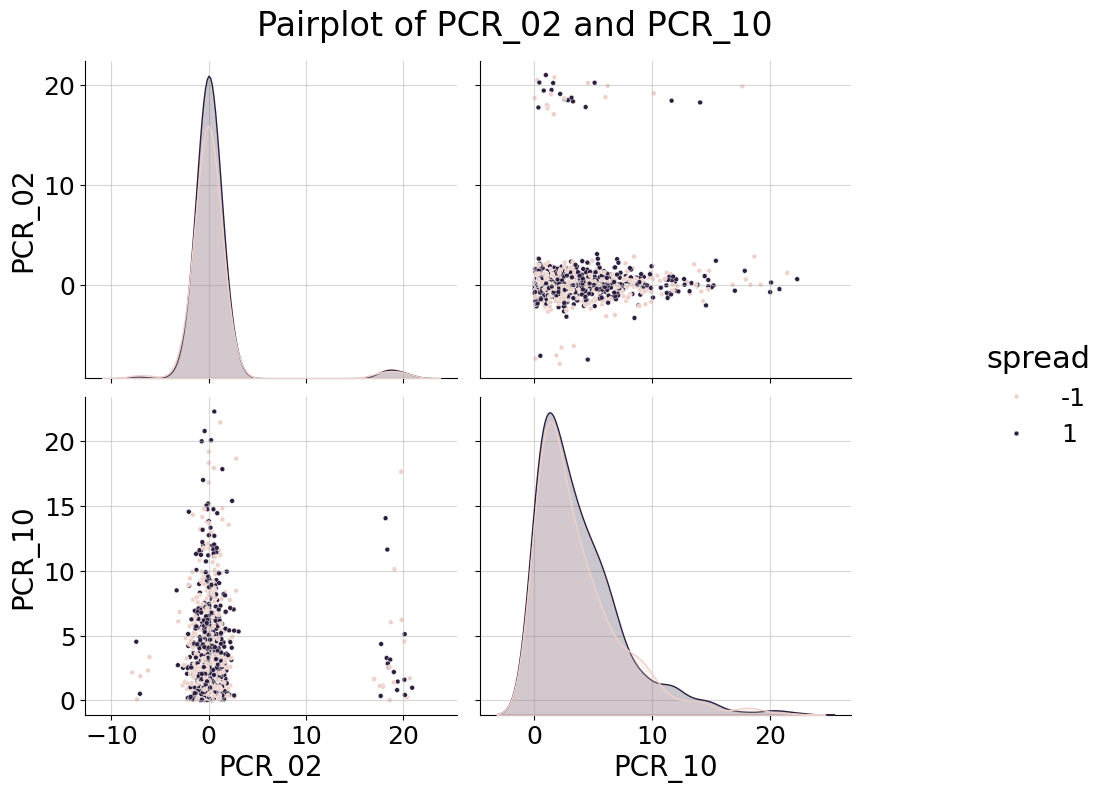

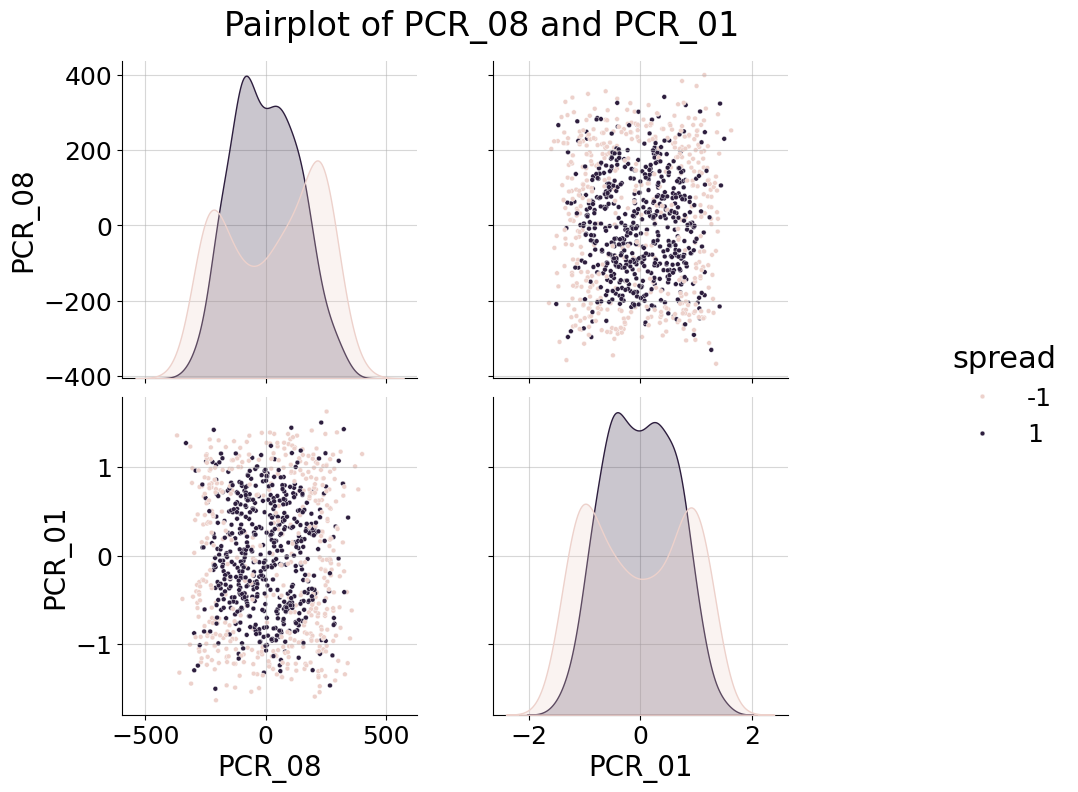

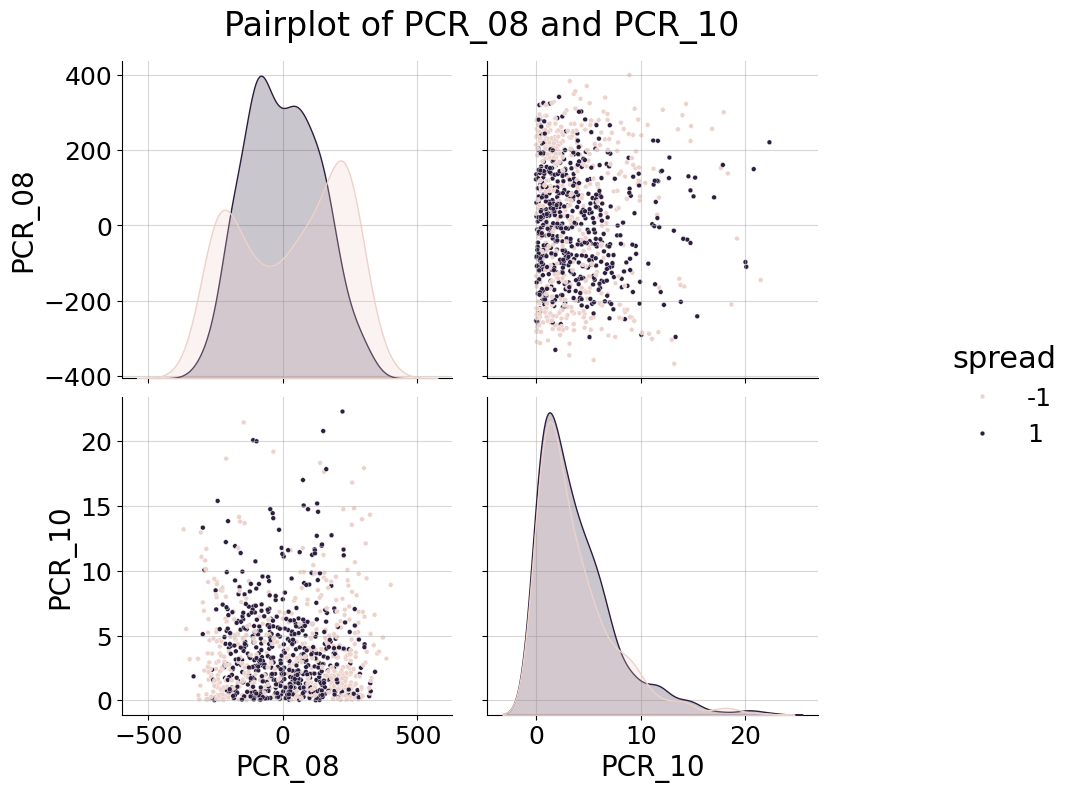

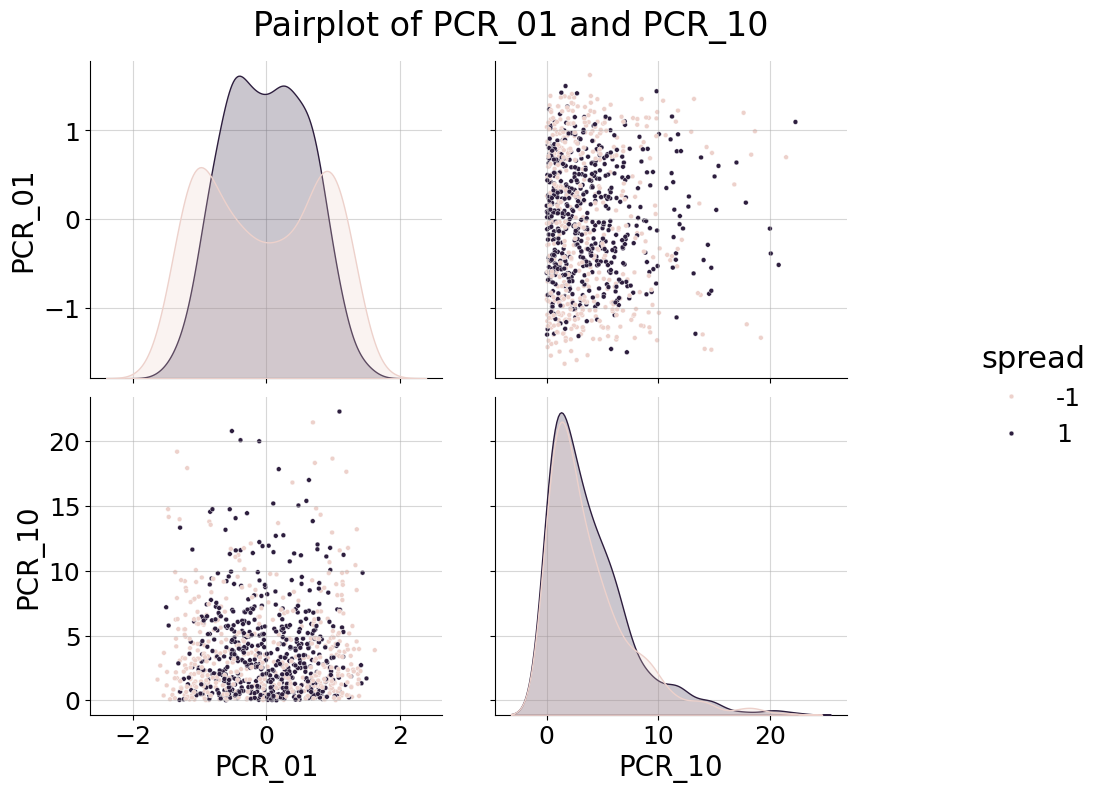

In [13]:
# plot pairplots of pairs from {"PCR_01", "PCR_02", "PCR_08", "PCR_10"}
from itertools import combinations
for metric1, metric2 in combinations({"PCR_01", "PCR_02", "PCR_08", "PCR_10"}, 2):
  g=sns.pairplot(train[[metric1, metric2, "spread"]], hue="spread",plot_kws={"s": 12})
  g.fig.suptitle(f"Pairplot of {metric1} and {metric2}", y=1.04)
  for ax in np.ravel(g.axes):
    ax.grid(alpha=0.5)
  g.fig.set_size_inches(12,8)


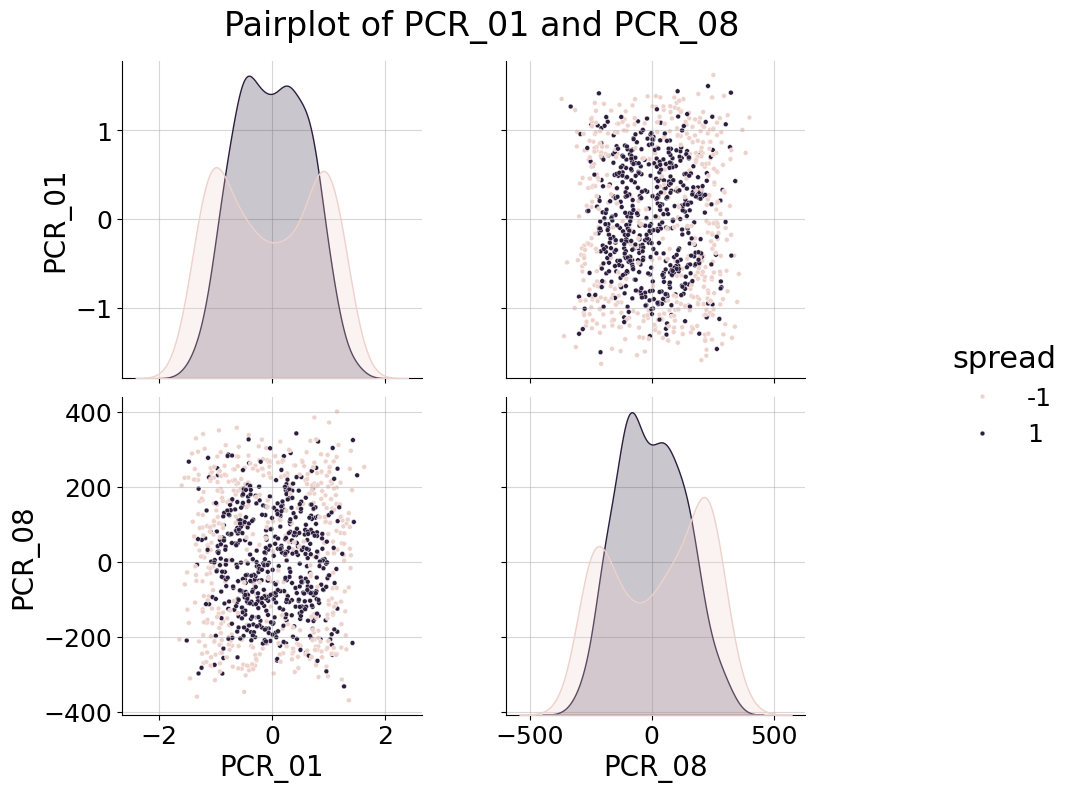

In [14]:
# plot pairplot of PCR_01 and PCR_08
g=sns.pairplot(train[["PCR_01", "PCR_08", "spread"]], hue="spread",plot_kws={"s": 12})
g.fig.suptitle("Pairplot of PCR_01 and PCR_08", y=1.04)
for ax in np.ravel(g.axes):
  ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

In [15]:
# calculate correlation of PCR_01 and PCR_08
train[["PCR_01", "PCR_08", "spread"]].corr()

PCR_01    PCR_08    spread
PCR_01  1.000000  0.013074  0.027615
PCR_08  0.013074  1.000000 -0.085300
spread  0.027615 -0.085300  1.000000

In [16]:
# kNN implementation

from sklearn.base import BaseEstimator,ClassifierMixin
from scipy.spatial.distance import cdist
class kNN(BaseEstimator, ClassifierMixin):
  def __init__(self, n_neighbors:int = 3):
    self.n_neighbors = n_neighbors

  def fit(self, X, y):
    self.X_train = np.copy(X)
    self.y_train = np.copy(y)
    return self

  def predict(self, X):
    distances = cdist(np.copy(X), self.X_train)
    indices = (np.argpartition(distances, self.n_neighbors-1))[:,:self.n_neighbors]
    labels = self.y_train.flatten()[indices]
    predictions = np.sign(np.sum(labels, axis=1))
    return predictions

# PROVIDED VISUALIZE_CLF FUNCTION

In [17]:
# provided visualize_clf func

def visualize_clf(clf, X, Y, title,
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)

    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()

# OUR CODE - CONTINUED

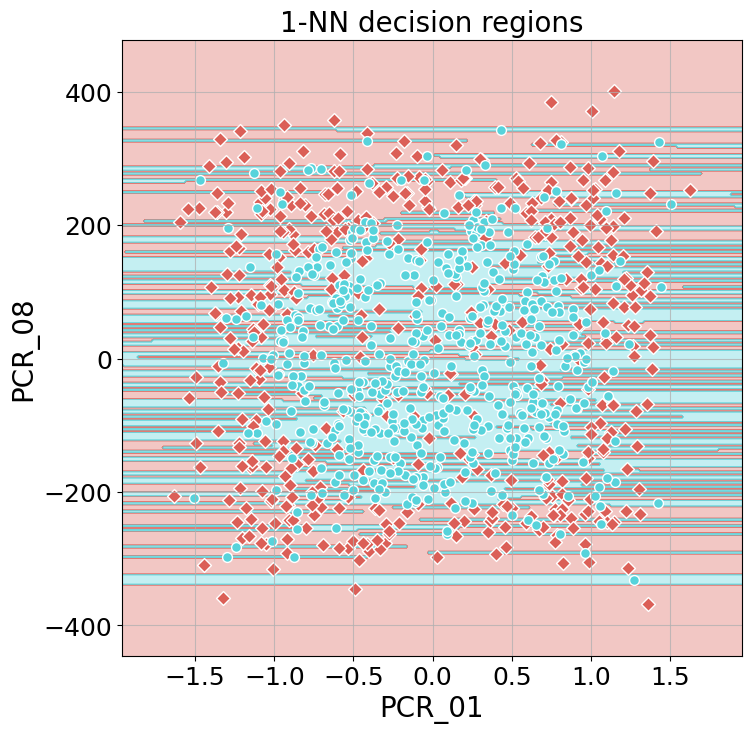

In [18]:
# visualizing the decision regions of our model of k=1
train_X = train[['PCR_01','PCR_08']].copy()
train_Y = train[['spread']].copy()
model = kNN(1)
model.fit(train_X, train_Y)
visualize_clf(model, train_X, train_Y, '1-NN decision regions', 'PCR_01', 'PCR_08')

In [19]:
# computing the training accuracy of our model
test_X = test[['PCR_01','PCR_08']].copy()
test_Y = test[['spread']].copy()
print(f"The 1-NN model's train accuracy score is: {model.score(train_X, train_Y)}")
print(f"The 1-NN model's test accuracy score is: {model.score(test_X, test_Y)}")

The 1-NN model's train accuracy score is: 1.0
The 1-NN model's test accuracy score is: 0.612


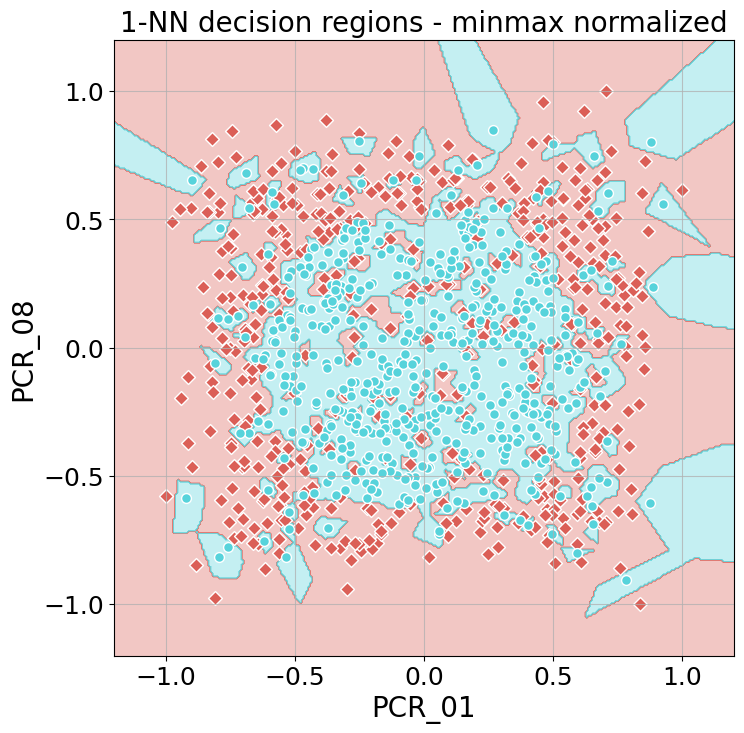

In [20]:
# normalizing using min-max

minmax_train_X = train_X.copy()
minmax_train_Y = train_Y.copy()

def minmax_normalize(df):
  for col in df.columns:
    df[col] = 2 * ((df[col] - df[col].min()) / (df[col].max() - df[col].min())) - 1
  return df

minmax_train_X = minmax_normalize(minmax_train_X)
minmax_model = kNN(1)
minmax_model.fit(minmax_train_X, minmax_train_Y)
visualize_clf(minmax_model, minmax_train_X, minmax_train_Y, '1-NN decision regions - minmax normalized', 'PCR_01', 'PCR_08')

In [21]:
# calculate accuracy of minmax scaled model
minmax_test_Y = test_Y.copy()
minmax_test_X = minmax_normalize(test_X.copy())

print(f"The min-max normalized model's train accuracy score is: {minmax_model.score(minmax_train_X, minmax_train_Y)}")
print(f"The min-max normalized model's test accuracy score is: {minmax_model.score(minmax_test_X, minmax_test_Y)}")

The min-max normalized model's train accuracy score is: 1.0
The min-max normalized model's test accuracy score is: 0.656


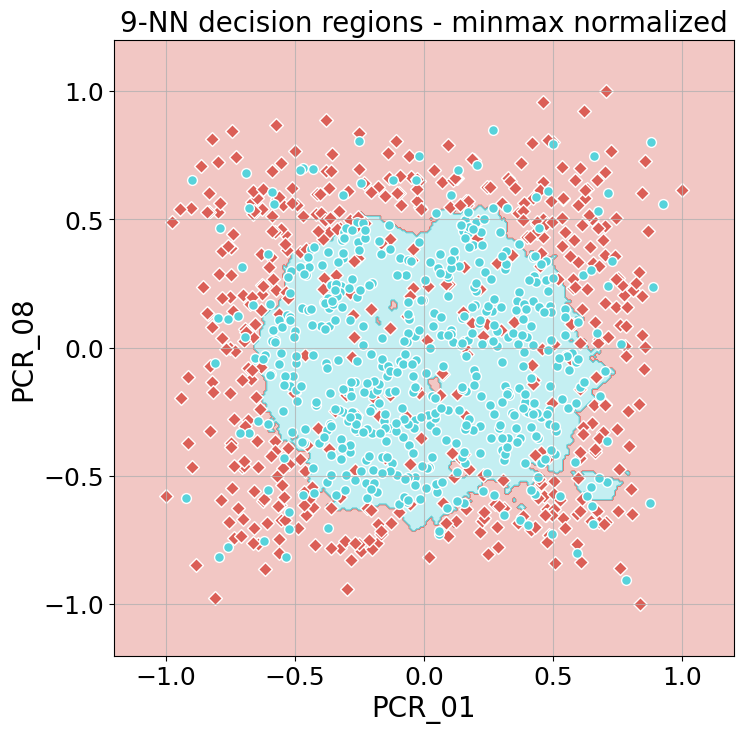

The min-max normalized 9-NN model's train accuracy score is: 0.812
The min-max normalized 9-NN model's test accuracy score is: 0.716


In [22]:
# train new model with k=9
minmax_model_9 = kNN(9)
minmax_model_9.fit(minmax_train_X, minmax_train_Y)
visualize_clf(minmax_model_9, minmax_train_X, minmax_train_Y, '9-NN decision regions - minmax normalized', 'PCR_01', 'PCR_08')
print(f"The min-max normalized 9-NN model's train accuracy score is: {minmax_model_9.score(minmax_train_X, minmax_train_Y)}")
print(f"The min-max normalized 9-NN model's test accuracy score is: {minmax_model_9.score(minmax_test_X, minmax_test_Y)}")

In [23]:
# replace blood_type with boolean SpecialProprety

train["SpecialProperty"] = train["blood_type"].isin(["O+","B+"])
test["SpecialProperty"] = test["blood_type"].isin(["O+","B+"])
del train['blood_type']
del test['blood_type']

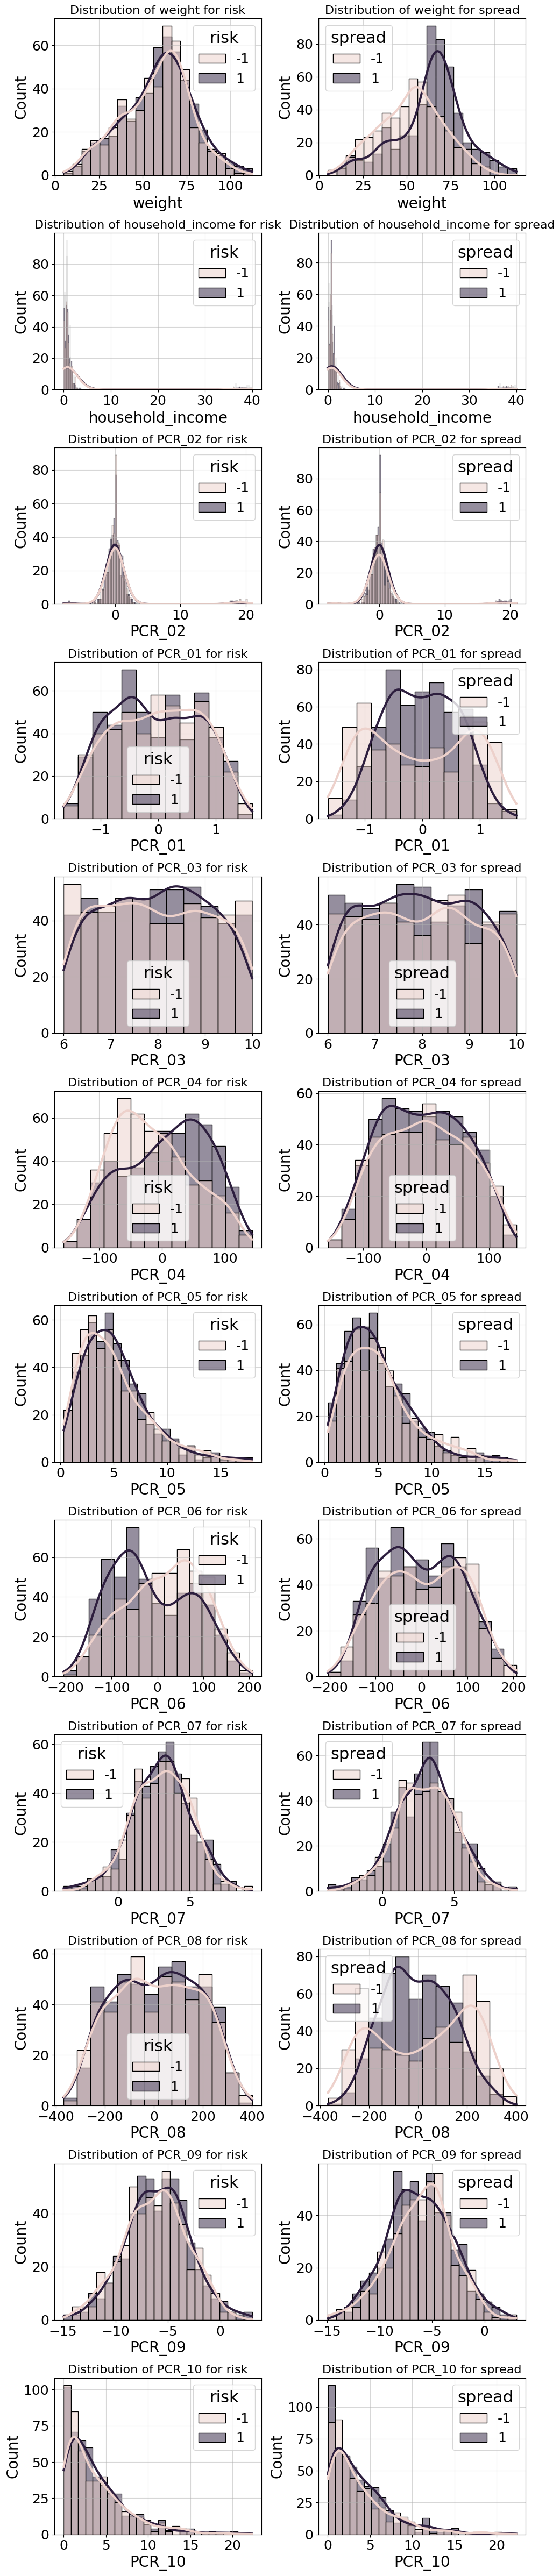

In [36]:
# plotting histograms for features

COL_NAME = [column for column in train.columns if "float" in train[column].dtype.name]
COLS, ROWS = (2, len(COL_NAME))
plt.figure(figsize=(5 * COLS, 4 * ROWS))
for row in range(ROWS):
  column = COL_NAME[row]
  for j, cls in enumerate(["risk", "spread"]):
    plt.subplot(ROWS,COLS, row * COLS + 1 + j)
    isContinuous = "float" in train[column].dtype.name
    sns.histplot(data=train, x=column, hue=cls, line_kws={"linewidth": 3},kde=isContinuous, multiple="layer" if isContinuous else "dodge")
    plt.grid(alpha=0.5)
    plt.title(f"Distribution of {column} for {cls}", fontdict={'fontsize': 16})
plt.tight_layout()

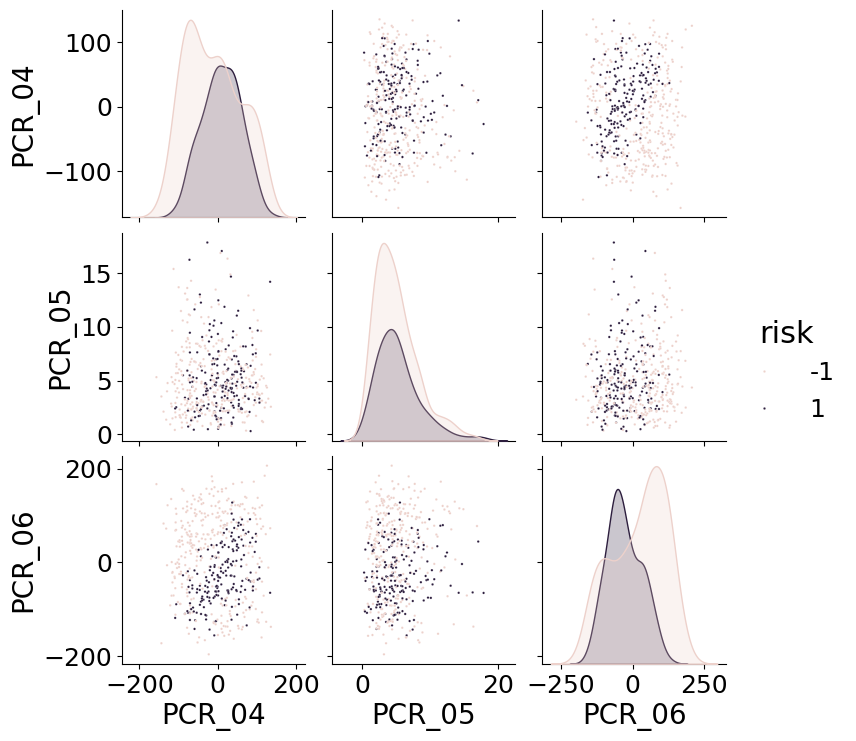

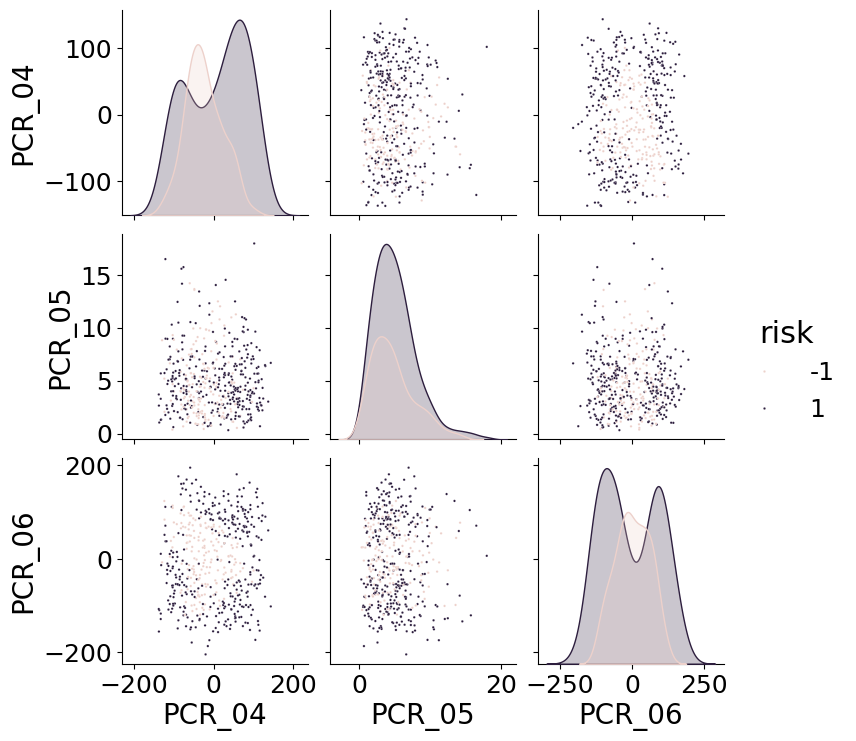

In [25]:
# splitting the dataset by SpecialProperty and plotting pairplot

train_T = train[train["SpecialProperty"] == True]
train_F = train[train["SpecialProperty"] == False]

sns.pairplot(train_T[["PCR_04", "PCR_05","PCR_06","risk"]], plot_kws={"s": 3}, hue="risk")
sns.pairplot(train_F[["PCR_04", "PCR_05","PCR_06","risk"]], plot_kws={"s": 3}, hue="risk")

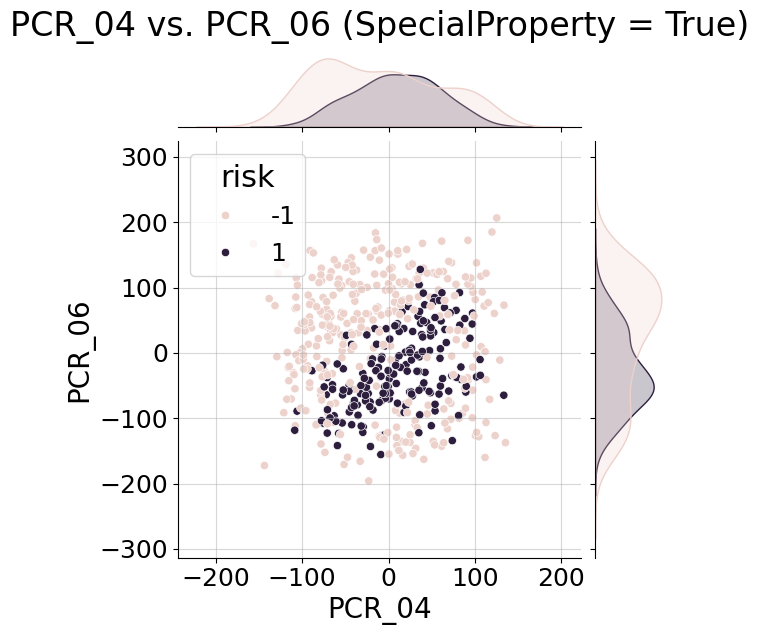

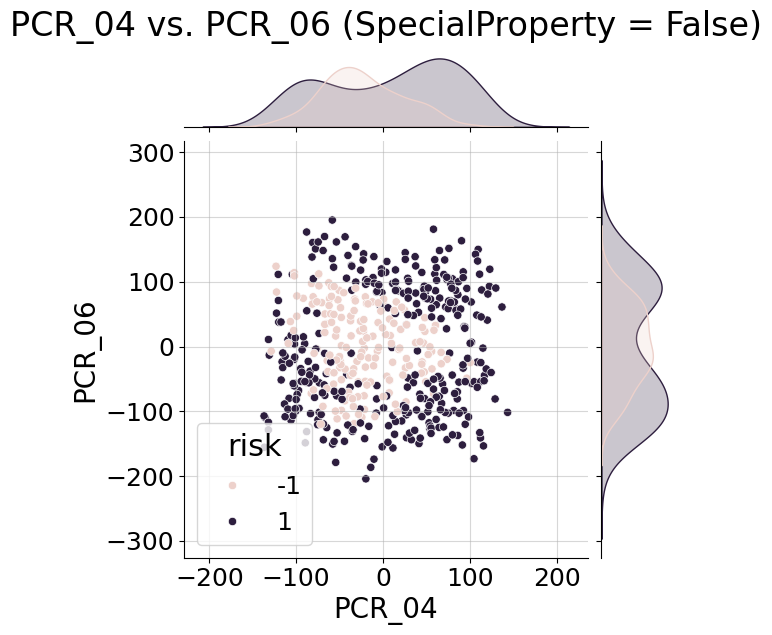

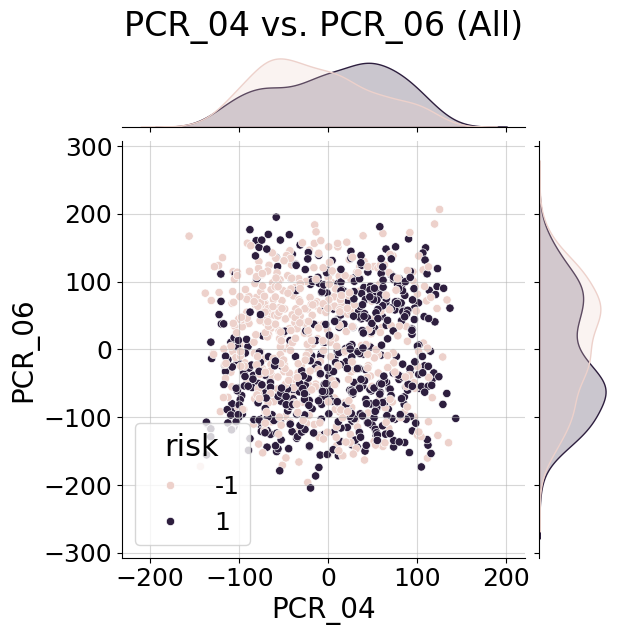

In [26]:
# plotting jointplots for PCR_04 and PCR_06, for the data in the two blood groups and for both

g = sns.jointplot(data=train_T, x="PCR_04", y="PCR_06", hue="risk")
_ = g.ax_joint.grid(alpha=0.5)
plt.suptitle("PCR_04 vs. PCR_06 (SpecialProperty = True)", y=1.05)
plt.show()

g = sns.jointplot(data=train_F, x="PCR_04", y="PCR_06", hue="risk")
_ = g.ax_joint.grid(alpha=0.5)
plt.suptitle("PCR_04 vs. PCR_06 (SpecialProperty = False)", y=1.05)
plt.show()

g = sns.jointplot(data=train, x="PCR_04", y="PCR_06", hue="risk")
_ = g.ax_joint.grid(alpha=0.5)
plt.suptitle("PCR_04 vs. PCR_06 (All)", y=1.05)
plt.show()

## PROVIDED PLOT3D FUNCTION

In [27]:
def plot3d(df, colX, colY, colZ, title, hue=None, s=1):
  %matplotlib inline

  fig = plt.figure(figsize=(20, 4))
  axes = [fig.add_subplot(1, 4, 1, projection='3d'),
          fig.add_subplot(1, 4, 2, projection='3d'),
          fig.add_subplot(1, 4, 3, projection='3d'),
          fig.add_subplot(1, 4, 4, projection='3d')]

  palette = sns.color_palette("hls", 2)

  for i,ax in enumerate(axes):
    if hue is None:
      ax.scatter3D(df[colX], df[colY], df[colZ], color=palette[0], s=s)
    else:
      idx = df[hue] == True
      df1 = df[idx]
      df2 = df[~idx]

      ax.scatter3D(df1[colX], df1[colY], df1[colZ], color=palette[0], s=s)
      ax.scatter3D(df2[colX], df2[colY], df2[colZ], color=palette[1], s=s)

    if i == 3 or i == 1:
      ax.set_xlabel(colX, labelpad=20)
      ax.set_ylabel(colY, labelpad=20)
    else:
      ax.xaxis.set_ticklabels([])
      ax.yaxis.set_ticklabels([])

    ax.view_init(elev=5., azim=45*i+15)

  axes[1].set_zlabel("\n" + colZ, labelpad=1)

  plt.suptitle(title)
  plt.subplots_adjust(wspace=0.1, top=0.99)
  plt.show()

## OUR CODE - CONTINUED

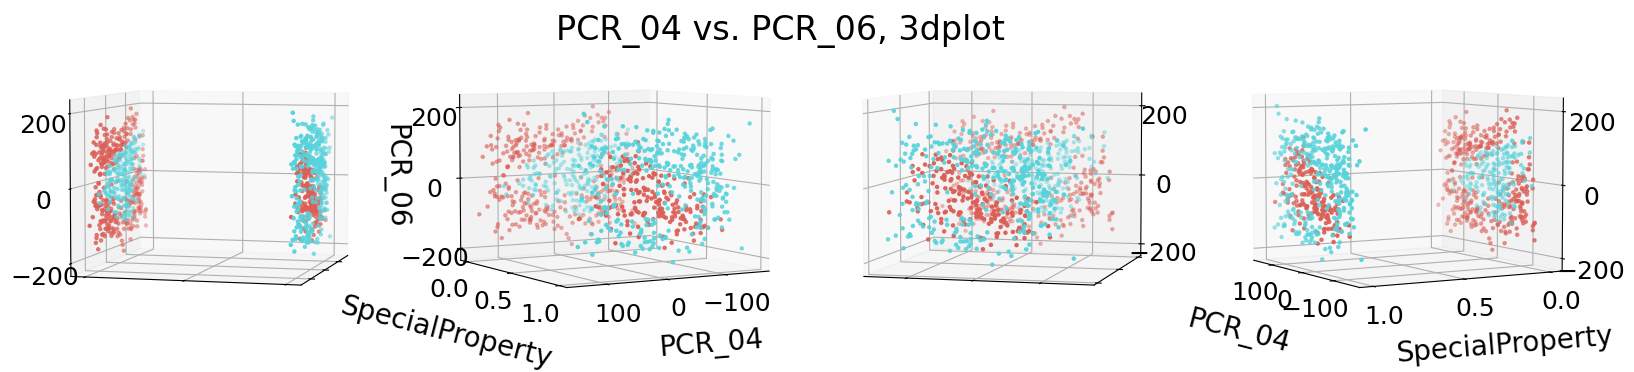

In [28]:
# plotting 3dplot of PCR_04 and PCR_06

plot3d(train, "PCR_04", "SpecialProperty", "PCR_06", title="PCR_04 vs. PCR_06, 3dplot", hue="risk", s=5)


In [29]:
# normalize all PCR features

from sklearn.preprocessing import StandardScaler, MinMaxScaler

standardscaler = StandardScaler()
minmaxscaler = MinMaxScaler(feature_range=(-1,1))

normalized_train = train.copy()
normalized_test = test.copy()

for metric in ["PCR_01", "PCR_03", "PCR_04", "PCR_06", "PCR_07", "PCR_08", "PCR_09"]:
  normalized_train[metric] = minmaxscaler.fit_transform(normalized_train[[metric]])
  normalized_test[metric] = minmaxscaler.fit_transform(normalized_test[[metric]])

for metric in ["PCR_02", "PCR_05", "PCR_10"]:
  normalized_train[metric] = standardscaler.fit_transform(normalized_train[[metric]])
  normalized_test[metric] = standardscaler.fit_transform(normalized_test[[metric]])

In [30]:
# writing prepare.py, will later be copied



def prepare_data(training_data, new_data):
  import pandas as pd
  from sklearn.preprocessing import StandardScaler, MinMaxScaler

  new_data_copy = new_data.copy()

  #  fill the missing values
  household_income_median = training_data.household_income.median()
  PCR_02_median = training_data.PCR_02.median()
  new_data_copy = new_data_copy.fillna(value={"household_income": household_income_median, "PCR_02": PCR_02_median})

  # replace blood_type with boolean SpecialProprety
  new_data_copy["SpecialProperty"] = new_data_copy["blood_type"].isin(["O+","B+"])
  del new_data_copy["blood_type"]

  # scale PCR features
  standard_scaler = StandardScaler()
  minmax_scaler = MinMaxScaler(feature_range=(-1,1))

  for metric in ["PCR_01", "PCR_03", "PCR_04", "PCR_06", "PCR_07", "PCR_08", "PCR_09"]:
    new_data_copy[metric] = minmax_scaler.fit_transform(new_data_copy[[metric]])

  for metric in ["PCR_02", "PCR_05", "PCR_10"]:
    new_data_copy[metric] = standard_scaler.fit_transform(new_data_copy[[metric]])

  return new_data_copy


In [31]:
# applying the prepare function to the train and test datasets
train_df, test_df = train_test_split(dataset, test_size=0.2, random_state=103)
train_df_prepared = prepare_data(train_df, train_df)
test_df_prepared = prepare_data(train_df, test_df)

# How to download from Colab?

In [32]:
# saving the dataframes
from google.colab import files
dataframes = {"train_df_prepared": train_df_prepared, "test_df_prepared": test_df_prepared}
for name, df in dataframes.items():
  outputPath = f"{name}.csv"
  df.to_csv(outputPath)
  files.download(outputPath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>